In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables 
Base.classes.keys()
#measurement and station

['measurement', 'station']

In [6]:
# View all of the classes that automap found
for classes in Base.classes:
        print(classes)

<class 'sqlalchemy.ext.automap.measurement'>
<class 'sqlalchemy.ext.automap.station'>


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#inspect engine to find columns for measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#inspect engine to find columns for station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(f'Most Recent Date: {latest_date}')

Most Recent Date: 2017-08-23


In [12]:
#setting up the formatting of the time to input into time delta
latest_date_2 = dt.datetime.strptime(latest_date, '%Y-%m-%d')
latest_year = int(latest_date_2.strftime("%Y"))
latest_month = int(latest_date_2.strftime("%m"))
latest_day = int(latest_date_2.strftime("%d"))

In [35]:
# query to retrieve the last 12 months of precipitation data
start_date = dt.date(latest_year, latest_month, latest_day) - dt.timedelta(days=365)
# query to retrieve the date and precipitation scores
measurement_data = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= start_date).all()
measurement_data
# added to a dataframe
measurement_df = pd.DataFrame(measurement_data, columns=['date', 'precipitation (in)'])
measurement_df.set_index('date', inplace=True)
# sort by date
measurement_df = measurement_df.sort_index()

In [45]:
#when dividing the length of the dataframe by 185 give 13 slots for dates
#finding the date 
ticks = [measurement_df.index.values[0]]
whole = False
x = 0
y = 1
for index, row in measurement_df.iterrows():
    if x/(185*y) == 1:
        ticks.append(measurement_df.index.values[x])
        x = x + 1
        y = y + 1
    else:
        x = x + 1

12.054054054054054
['2016-08-23', '2016-09-21', '2016-10-20', '2016-11-17', '2016-12-17', '2017-01-16', '2017-02-14', '2017-03-16', '2017-04-15', '2017-05-16', '2017-06-15', '2017-07-15', '2017-08-21']


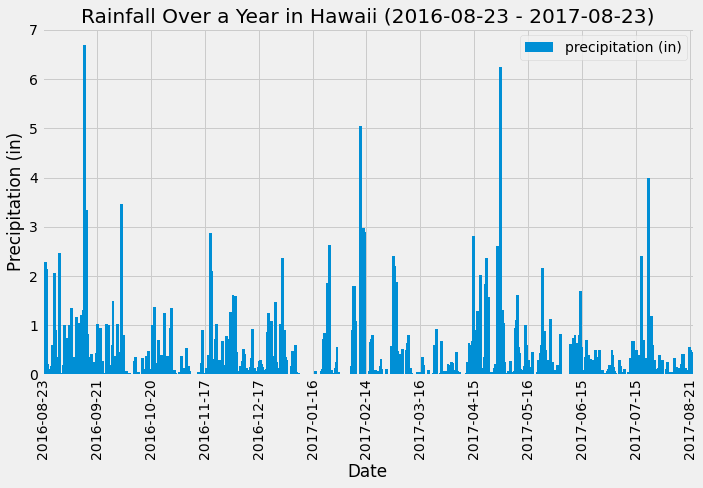

In [46]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(kind="bar", width=10, figsize=(10,7))
plt.title(f'Rainfall Over a Year in Hawaii ({start_date} - {latest_date})')
plt.ylabel("Precipitation (in)")
plt.xlabel("Date")
plt.xticks(np.arange(0, len(measurement_df["precipitation (in)"]), 185), ticks)
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [19]:
# Close Session
session.close()